# Billboard Chart-Points EDA

This is where I'll make the basic EDA charts for chart-points. I'm replicating slides 6-13 in my initial slideshow

In [1]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime



%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
#shape of initial dataframe
billboard_df.shape

(317795, 10)

In [4]:
# Checking Initial Head
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [5]:
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [6]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [7]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [8]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [9]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 


In [10]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [11]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

# End of cleaning billboard_df

In [12]:
billboard_df['has_feature'] = billboard_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

In [13]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [14]:
billboard_df.head(500)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,has_feature,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None,0,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None,0,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None,0,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None,0,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None,0,74
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,Jane Child,None,0,77
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,Jane Child,None,0,89
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,Jane Child,None,0,95
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,Jane Child,None,0,95
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,Jane Child,None,0,99


In [20]:
# creating groupby for performers

main_performer_summed_groupby = billboard_df.groupby('main_performer').sum()

In [21]:
# creating groupby for performers

featured_performer_summed_groupby = billboard_df.groupby('featured_performer').sum()

In [22]:
main_performer_summed_groupby = main_performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)

In [23]:
featured_performer_summed_groupby = featured_performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)

In [24]:
main_performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
main_performer,,,,,,,,,,
Drake,50972,1248,40386.0,31474,12226,7849,18148,2332660,461,65986
Rihanna,28286,1022,24813.0,18112,11875,5569,13705,1761560,310,60190
Taylor Swift,36615,1503,29847.0,23226,13562,6338,15198,1917259,84,59638
Elvis Presley,36785,967,30510.0,29953,5807,6413,15245,1874106,0,59468
Madonna,30122,886,25173.0,12859,8625,5693,13813,1763558,28,59263


In [25]:
featured_performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
featured_performer,,,,,,,,,,
Drake,32723,728,29264.0,23072,7605,4330,10796,1391864,691,37068
Lil Wayne,30790,729,26216.0,23407,6908,3927,9954,1258344,626,32436
Nicki Minaj,18580,512,15469.0,13712,5040,3071,7146,918067,456,27476
T-Pain,9725,322,8548.0,7081,4135,1985,4750,614552,306,21181
Rihanna,10050,343,8869.0,5135,3973,1980,4702,597812,297,19947


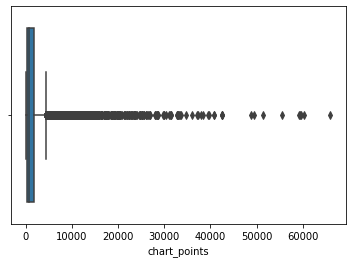

In [27]:
# plotting distribution of "chart_points" by performer

ax = sns.boxplot(x="chart_points", data=main_performer_summed_groupby)

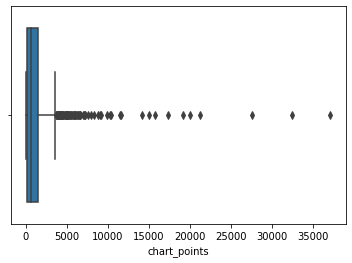

In [26]:
# plotting distribution of "chart_points" by performer

ax = sns.boxplot(x="chart_points", data=featured_performer_summed_groupby)

(array([7.338e+03, 3.610e+02, 1.210e+02, 5.600e+01, 2.300e+01, 1.000e+01,
        6.000e+00, 3.000e+00, 2.000e+00, 4.000e+00]),
 array([1.00000e+00, 6.59950e+03, 1.31980e+04, 1.97965e+04, 2.63950e+04,
        3.29935e+04, 3.95920e+04, 4.61905e+04, 5.27890e+04, 5.93875e+04,
        6.59860e+04]),
 <a list of 10 Patch objects>)

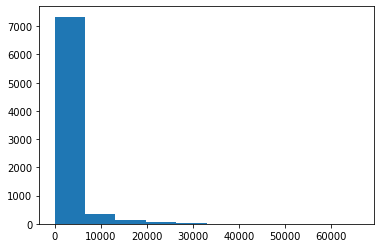

In [28]:
plt.hist(main_performer_summed_groupby.chart_points)

(array([1.174e+03, 6.200e+01, 9.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([1.00000e+00, 3.70770e+03, 7.41440e+03, 1.11211e+04, 1.48278e+04,
        1.85345e+04, 2.22412e+04, 2.59479e+04, 2.96546e+04, 3.33613e+04,
        3.70680e+04]),
 <a list of 10 Patch objects>)

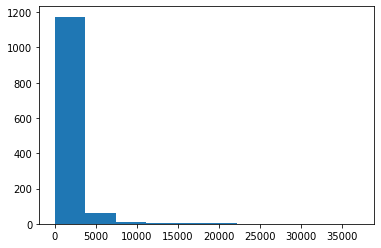

In [29]:
plt.hist(featured_performer_summed_groupby.chart_points)

In [36]:
main_performer_summed_groupby.chart_points.describe()

count     7924.000000
mean      2025.350076
std       4417.242284
min          1.000000
25%        140.000000
50%        638.500000
75%       1812.000000
max      65986.000000
Name: chart_points, dtype: float64

In [37]:
featured_performer_summed_groupby.chart_points.describe()

count     1257.000000
mean      1240.065235
std       2475.237038
min          1.000000
25%         87.000000
50%        565.000000
75%       1500.000000
max      37068.000000
Name: chart_points, dtype: float64

In [31]:
# OK, time to do the same stuff by song 

song_id_summed_groupby = billboard_df.groupby('song_id').sum()

In [32]:
song_id_summed_groupby = song_id_summed_groupby.sort_values(by=['chart_points'], ascending=False)

In [33]:
song_id_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
song_id,,,,,,,,,,
RadioactiveImagine Dragons,2855,172,2708.0,1991,3828,562,1345,175134,0,5932
How Do I LiveLeAnn Rimes,1354,69,1309.0,411,2415,473,1093,137834,0,5615
Foolish Games/You Were Meant For MeJewel,1066,65,1019.0,457,2145,409,1030,129808,0,5499
I'm YoursJason Mraz,2243,76,2195.0,1345,2926,510,1199,152649,0,5433
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1517,135,1390.0,507,2346,429,1098,136777,68,5351


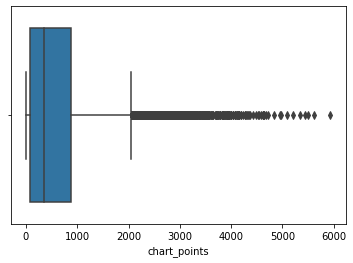

In [34]:
ax = sns.boxplot(x="chart_points", data=song_id_summed_groupby)

(array([1.7778e+04, 6.3530e+03, 2.8050e+03, 7.1400e+02, 3.0800e+02,
        1.3600e+02, 6.3000e+01, 2.6000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.0000e+00, 5.9410e+02, 1.1872e+03, 1.7803e+03, 2.3734e+03,
        2.9665e+03, 3.5596e+03, 4.1527e+03, 4.7458e+03, 5.3389e+03,
        5.9320e+03]),
 <a list of 10 Patch objects>)

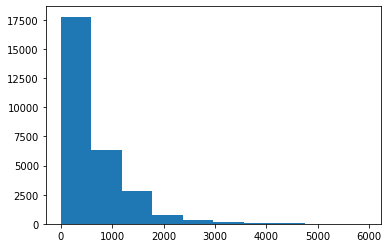

In [35]:
plt.hist(song_id_summed_groupby.chart_points)

In [38]:
# Calculating outliers for song_id 

song_id_summed_groupby.chart_points.describe()

count    28193.00000
mean       569.25031
std        625.16761
min          1.00000
25%         89.00000
50%        361.00000
75%        877.00000
max       5932.00000
Name: chart_points, dtype: float64

# I think this is the end of this notebook- I just wanted to replicate the charts from Billboard 1.